In [23]:
import numpy as N
import pandas as P
import seaborn as S
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = P.read_csv("./data/kidney.csv")

In [4]:
# Split features and target
X_, y_ = df.iloc[:,:-1],df.iloc[:,-1]

In [5]:
def class2num(diag):
    if diag == 'ckd':
        num = 1
    elif diag == 'notckd':
        num = 0
    return num

In [6]:
# Converting target to numeric
y_ = y_.apply(class2num)

In [12]:
# Extracting numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_num = X_.select_dtypes(include=numerics)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

In [14]:
features =  X_num.columns

In [13]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
for feature in zip(features, clf.feature_importances_):
    print(feature)

('age', 0.004338376125887011)
('bp', 0.010230988204788941)
('sg', 0.1376995142594927)
('al', 0.07243731725094356)
('su', 0.009776180683088383)
('bgr', 0.03647770595622766)
('bu', 0.03700408209592828)
('sc', 0.19123223522073235)
('sod', 0.008613746535648496)
('pot', 0.0024592506848006715)
('hemo', 0.19742542741612062)
('pcv', 0.19373075773345974)
('wbcc', 0.004711003996980348)
('rbcc', 0.0938634138359014)


In [34]:
X_train.loc[:,['sc','pcv','hemo']].corr()

,sc,pcv,hemo
sc,1.000000,-0.664337,-0.657181
pcv,-0.664337,1.000000,0.881289
hemo,-0.657181,0.881289,1.000000


In [45]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=1)
clf2.fit(X_train.loc[:,['hemo']], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
from sklearn.metrics import precision_score
y_pred = clf2.predict(X_test.loc[:,['hemo']])
print(precision_score(y_test,y_pred))

1.0


In [47]:
X_qual = X_.select_dtypes(exclude=numerics)

In [48]:
from sklearn import tree

[Text(167.4, 163.07999999999998, 'X[0] <= 12.85\ngini = 0.468\nsamples = 126\nvalue = [79, 47]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.07\nsamples = 82\nvalue = [79, 3]')]

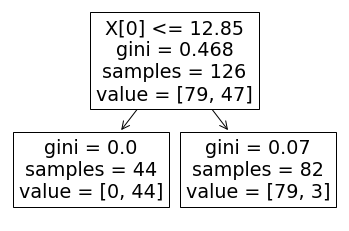

In [49]:
tree.plot_tree(clf2.fit(X_train.loc[:,['hemo']], y_train)) 

In [62]:
X_[X_['hemo']<=12].shape[0]

60

In [63]:
X_[X_['hemo']>=13].shape[0]

121

In [11]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_.select_dtypes(include=numerics), y_)
for feature in zip(features, clf.feature_importances_):
    print(feature)

('age', 0.0033924632119275958)
('bp', 0.012600066065117321)
('sg', 0.12826310896790555)
('al', 0.07250778118992965)
('su', 0.015482773079098951)
('bgr', 0.035197206977720004)
('bu', 0.03434065423393005)
('sc', 0.17615225440352622)
('sod', 0.007405522249698328)
('pot', 0.0024139136173943723)
('hemo', 0.20764433349524986)
('pcv', 0.20113894211550307)
('wbcc', 0.0041691365896117365)
('rbcc', 0.09929184380338728)


/home/hengoat/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


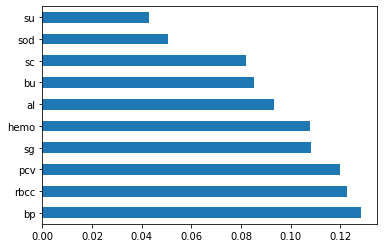

In [20]:
model = ExtraTreesClassifier()
model.fit(X_.select_dtypes(include=numerics), y_)
feat_importances = P.Series(model.feature_importances_, index=X_.select_dtypes(include=numerics).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [22]:
# Get list of categorical variables
s = (X_.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [28]:
# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])

/home/hengoat/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


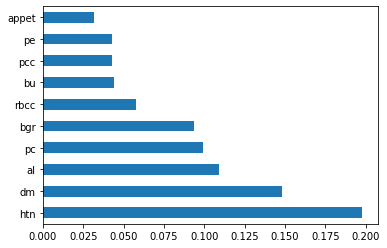

In [41]:
model = ExtraTreesClassifier()
model.fit(label_X_train, y_train)
feat_importances = P.Series(model.feature_importances_, index=label_X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [40]:
label_X_train['ane'].unique()

array([0, 1])